In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Reading the Advertisement dataset

In [2]:
# "Advertising.csv" containts the data set used in this exercise
data_filename = 'Advertising.csv'

# Read the file "Advertising.csv" file using the pandas library
df = pd.read_csv(data_filename)


In [3]:
# Get a quick look of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Plotting the graph

Text(0.5, 1.0, 'TV Advertising Budget vs Sales')

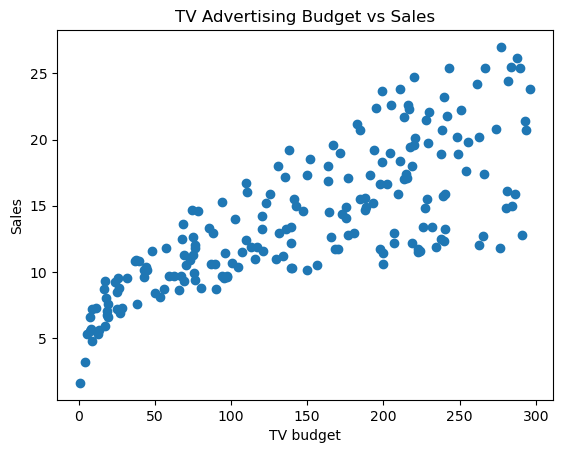

In [4]:
# Use a scatter plot for plotting a graph of TV vs Sales
plt.scatter(df['TV'], df['Sales'])

# Add axis labels for clarity (x : TV budget, y : Sales)
plt.xlabel('TV budget')
plt.ylabel('Sales')


# Add plot title 
plt.title('TV Advertising Budget vs Sales')


Text(0.5, 1.0, 'Radio Advertising Budget vs Sales')

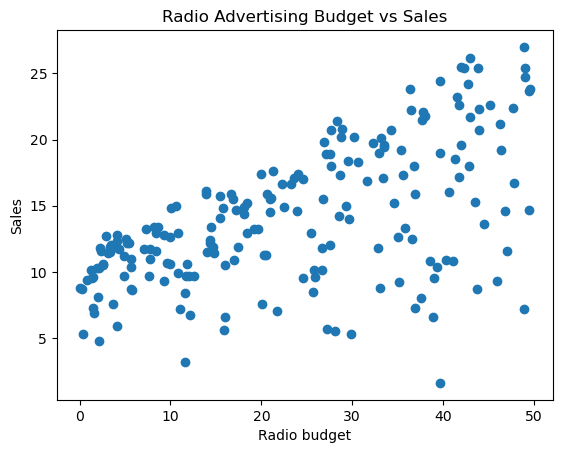

In [5]:
# Use a scatter plot for plotting a graph of Radio vs Sales
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio budget')
plt.ylabel('Sales')


# Add plot title 
plt.title('Radio Advertising Budget vs Sales')

Text(0.5, 1.0, 'Newspaper Advertising Budget vs Sales')

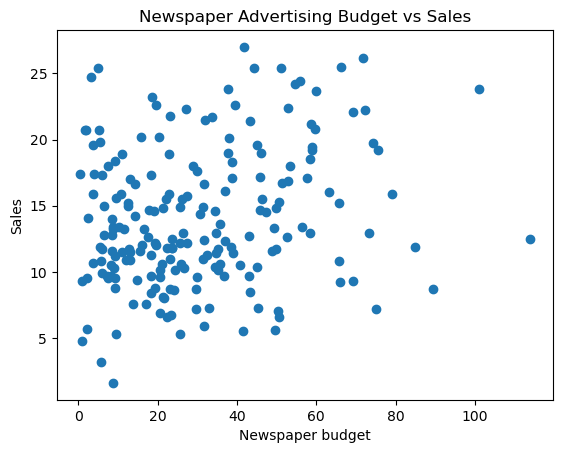

In [6]:
# Use a scatter plot for plotting a graph of Newspaper vs Sales
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper budget')
plt.ylabel('Sales')


# Add plot title 
plt.title('Newspaper Advertising Budget vs Sales')

**Now  prepare a train test split for further analysis**

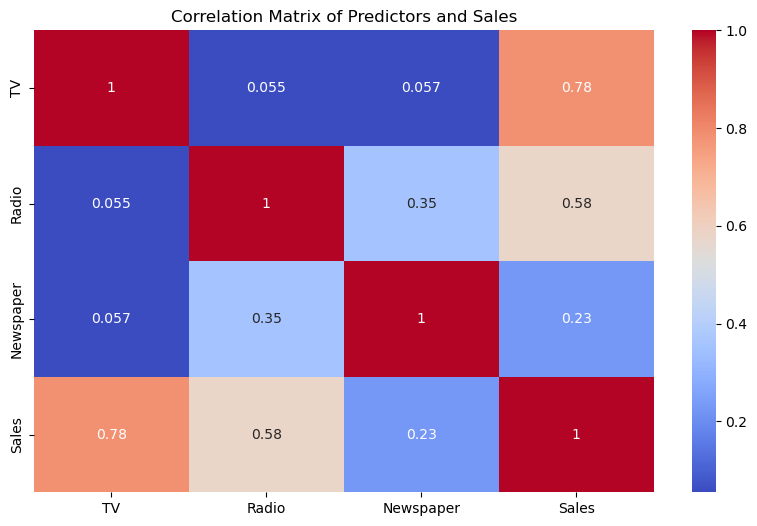

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np
# Split the data into predictors (X) and response (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Correlation matrix to check linear relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Predictors and Sales')
plt.show()

In [13]:
## Step 1: Ridge and Lasso Regression with Hyperparameter Tuning
# Scaling the data
scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

# Define alpha range for GridSearchCV
alpha_range = np.logspace(-3, 3, 100)

# Ridge Regression - Cross-validation for alpha
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, {'alpha': alpha_range}, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)
best_ridge_alpha = ridge_cv.best_params_['alpha']
print("Optimal Ridge Alpha:", best_ridge_alpha)
# Lasso Regression - Cross-validation for alpha
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, {'alpha': alpha_range}, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)
best_lasso_alpha = lasso_cv.best_params_['alpha']
print("Optimal Lasso Alpha:", best_lasso_alpha)



Optimal Ridge Alpha: 0.001
Optimal Lasso Alpha: 1.072267222010323


Linear Regression MSE: 3.1740973539761037 R-squared: 0.899438024100912
Ridge Regression MSE: 3.1740973514255293 R-squared: 0.8994380241817195
Lasso Regression MSE: 3.1419552917488005 R-squared: 0.9004563511799476


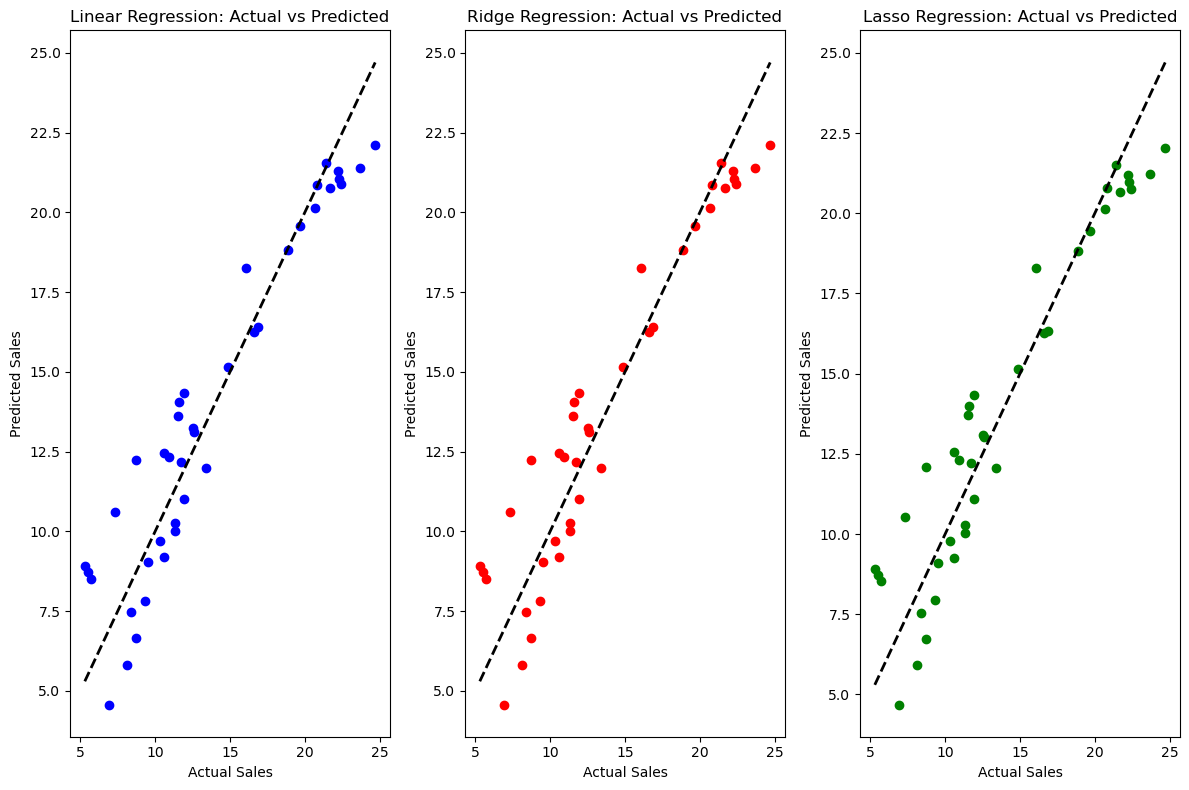

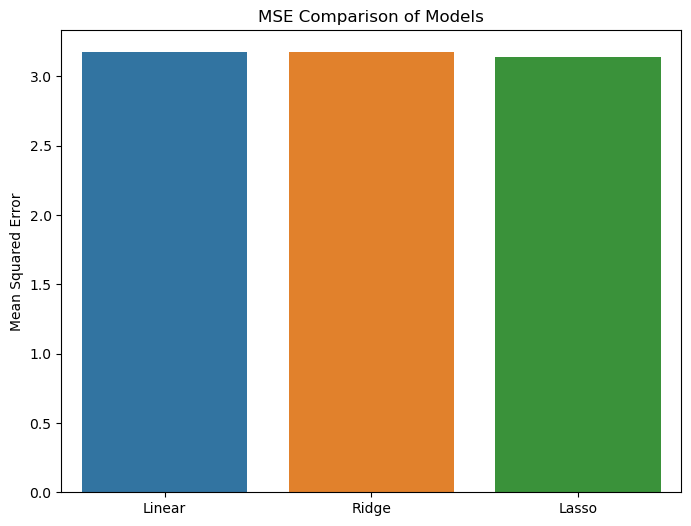

In [16]:
## Step 2: Train Linear, Ridge, and Lasso Regression Models
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train_scaled, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train_scaled, y_train)

## Step 3: Evaluate Models and Compare
# Predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Metrics for comparison
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Linear Regression MSE:", mse_linear, "R-squared:", r2_linear)
print("Ridge Regression MSE:", mse_ridge, "R-squared:", r2_ridge)
print("Lasso Regression MSE:", mse_lasso, "R-squared:", r2_lasso)

## Step 4: Visualization
# Plot actual vs predicted for each model
plt.figure(figsize=(12, 8))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()

# Bar plot of MSE comparison
plt.figure(figsize=(8, 6))
models = ['Linear', 'Ridge', 'Lasso']
mse_values = [mse_linear, mse_ridge, mse_lasso]
sns.barplot(x=models, y=mse_values)
plt.title('MSE Comparison of Models')
plt.ylabel('Mean Squared Error')
plt.show()